<>:89: SyntaxWarning: invalid escape sequence '\s'
<>:102: SyntaxWarning: invalid escape sequence '\s'
<>:89: SyntaxWarning: invalid escape sequence '\s'
<>:102: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3734399554.py:89: SyntaxWarning: invalid escape sequence '\s'
  '''
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3734399554.py:102: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3734399554.py:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(dfs))


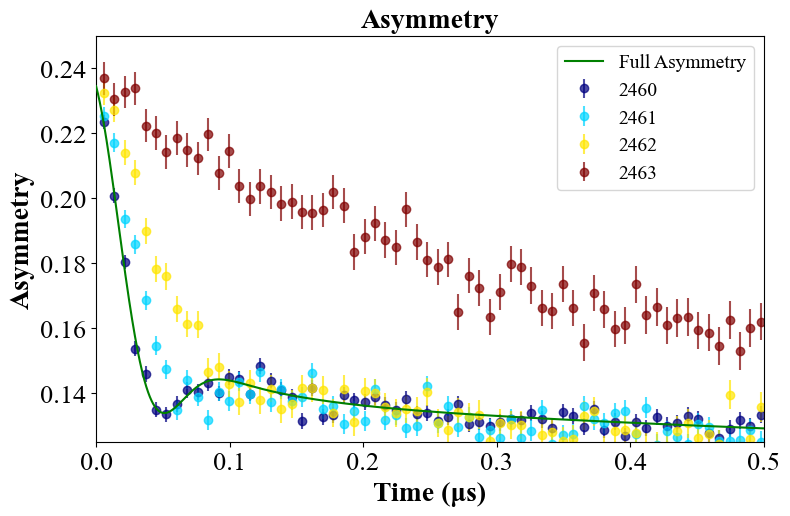

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt, font_manager as fm
plt.rcParams['figure.figsize'] = [6,3]

def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,             # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag       
    beta_tail=1,       # β_tail
    beta_para=1,          # β_2
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5,
    Background=0          
):
    # Convert phase to radians
    phi_rad = np.pi * phi / 180
    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro
    #print(nu)

    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    #Background
    Background = 0
    
    # Full asymmetry function
    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4 + A_T * Background

    return A

#path = 'C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

datafile = '2460_80pack_0_1.dat'

datafiles= ['2460_80pack_0_1.dat',
            #'2461_80pack_0_1.dat',
            #'2462_80pack_0_1.dat',
            #'2463_80pack_0_1.dat',
            #'2464_80pack_0_1.dat',
            #'2465_80pack_0_1.dat',
            '2466_80pack_0_1.dat',
            '2467_80pack_0_1.dat',
            '2468_80pack_0_1.dat',
            #'2469_80pack_0_1.dat',
            #'2470_80pack_0_1.dat',
            #'2471_80pack_0_1.dat',
            #'2472_80pack_0_1.dat',
]


times = np.linspace(0,1, 10000)
t=np.array(times)
f_F=0.8369
sigma=28.5
nu=501.1
phi=21.5
lam_tail=15.3
lam_para=1 
lam_Ag=0.038          # λ_Ag     
beta_tail=1       # β_ta   
beta_para=1         # β_2
beta_Ag=1
A_T=0.2392
Ag_F=0.5 

'''
df = pd.read_csv(path + datafile, sep=',\s*', engine='python')
plt.ylabel('Asymmetry')
plt.xlabel('Time (μs)')
x=df['xData0']
y=df['data0']
yerr=df['errData0']


plt.errorbar(x, y, yerr=yerr, fmt='vg',alpha=.5)
A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)
'''

dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]

cmap = cm.get_cmap('jet', len(dfs))

a= 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rcParams['figure.figsize'] = [8,5]

plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

for i, df in enumerate(dfs):
    x=df['xData0']
    y=df['data0']
    yerr=df['errData0']
    plt.errorbar(x, y, yerr=yerr, fmt='o', color=cmap(i),alpha=.7, zorder=1, label=f'{2460+i}')


A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)

plt.ylabel('Asymmetry',fontsize=20,weight='bold')
plt.xlabel('Time (μs)',fontsize=20,weight='bold')
plt.ylim(0.125,0.25)
plt.xlim(0,0.5)
plt.plot(times, A, label='Full Asymmetry', color='g', zorder=10)


plt.tight_layout()
plt.legend(loc='upper right',fontsize=14)
plt.title('Asymmetry',fontsize=20,weight='bold')
plt.show()



In [54]:
#code to take musrfit output file and plot the desired run's different components
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#beta_fixed_post_lock_25_009.txt
def Plot_YBO_fit_components(run_no, datafile,x_min=0,x_max=10,points=10000, colour ='b'):
    '''
    run_no: the run number from the msr file you want to plot.
    datafile: the datafile where the fit parameters are stored. This must be in the same subfolder, or use the full filepath, ensure it is a headered file exported from musrfit.
    x_min/x_max: limits in time domain (μs) of where you want to plot until
    points: number of points for the function to be plotted at, effective resolution 
    '''
    df = pd.read_csv(datafile, delim_whitespace=True)
    #print(f'headers are: {list(df)}')

    df_run = df[df['RUN']==run_no].squeeze() #to make a series not a dataframe so I can do maths on it easily when multiplying by times which is an array. squeeze makes these from series of length (1,) into scalars so there is no broadcasting errors.

    times = np.linspace(x_min,x_max, points)
    t=np.array(times)

    f_F=df_run['Order_Vfrac_2461']
    sigma=df_run['YBO_sigma_2461']
    nu=df_run['Frequency_2461']
    phi=df_run['Phase']
    lam_tail=df_run['Tail_Lambda_2461']
    lam_para=df_run['YBO_paraLam2_2461'] 
    lam_Ag=df_run['Ag_Lambda']          # λ_Ag     
    beta_tail=1       # β_ta   
    beta_para=df_run['YBO_paraBeta2_2461'] # β_2
    try:
        Background=df_run['constant']
    except:
        Background=0
        
    print(beta_para)
    beta_Ag=1
    A_T=df_run['Asy_tot']
    Ag_F=df_run['Ag_frac']
    Temp=df_run['dataT']
    
    A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F,Background)

    phi_rad = np.pi * phi / 180

    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro


    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    #A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    A1= A_T * (1 - Ag_F) * (term1) #K-T gaussian damped cosine
    A2= A_T * (1 - Ag_F) * (term2) #Ordered Tail term
    A3= A_T * (1 - Ag_F) * (term3) #Disordered paramagnetic
    A4= A_T * Ag_F * term4 #Silver component
    A6= A_T * Background *t/t
    A5=A1+A2+A3+A4

    plt.plot(times, A1, label='K-T gaussian damped cosine', color='r')
    plt.plot(times, A2, label='Ordered Tail term', color='gold')
    plt.plot(times, A3, label='Disordered paramagnetic', color='green')
    plt.plot(times, A4, label='Silver component', color='silver')

    plt.plot(times, A6, label='Background', color='magenta')


    #plt.ylim(0,0.25)
    #plt.axhline(0.2392,color = 'r', label='Original Asy_tot')
    plt.xlim(0,1)
    plt.title(f'YBO Musr fit parameters for run {run_no}, {Temp} K')
    plt.plot(times, A, label='Full Asymmetry', color=colour)
    
#Plot_YBO_fit_components(2472, '15_07_25_para_newAg.txt')
#plt.legend()
#plt.show()







<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:101: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:101: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3003724896.py:88: SyntaxWarning: invalid escape sequence '\s'
  '''
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3003724896.py:101: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3003724896.py:103: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(dfs))


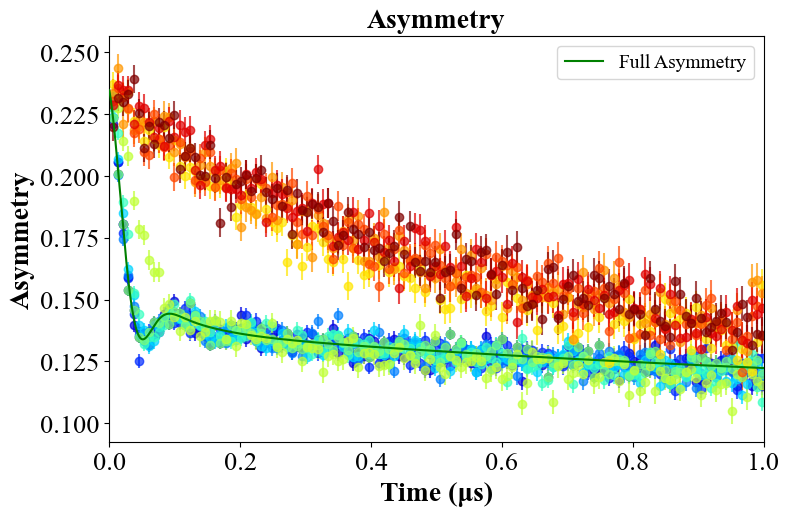

In [55]:
#This is properly implemented in Full_Single_plot_spectra_plotting.ipynb


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt, font_manager as fm
plt.rcParams['figure.figsize'] = [6,3]

def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,             # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag       
    beta_tail=1,       # β_tail
    beta_para=1,          # β_2
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5          
):
    # Convert phase to radians
    phi_rad = np.pi * phi / 180
    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro
    #print(nu)

    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    return A

#path = 'C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

datafile = '2460_80pack_0_1.dat'

datafiles= ['2460_80pack_0_1.dat',
            '2461_80pack_0_1.dat',
            '2462_80pack_0_1.dat',
            '2463_80pack_0_1.dat',
            '2464_80pack_0_1.dat',
            '2465_80pack_0_1.dat',
            '2460_80pack_0_1.dat',
            '2467_80pack_0_1.dat',
            '2468_80pack_0_1.dat',
            '2469_80pack_0_1.dat',
            '2470_80pack_0_1.dat',
            '2471_80pack_0_1.dat',
            '2472_80pack_0_1.dat',
]


times = np.linspace(0,1, 10000)
t=np.array(times)
f_F=0.8369
sigma=28.5
nu=501.1
phi=21.5
lam_tail=15.3
lam_para=1 
lam_Ag=0.038          # λ_Ag     
beta_tail=1       # β_ta   
beta_para=1         # β_2
beta_Ag=1
A_T=0.2392
Ag_F=0.5 

'''
df = pd.read_csv(path + datafile, sep=',\s*', engine='python')
plt.ylabel('Asymmetry')
plt.xlabel('Time (μs)')
x=df['xData0']
y=df['data0']
yerr=df['errData0']


plt.errorbar(x, y, yerr=yerr, fmt='vg',alpha=.5)
A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)
'''

dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]

cmap = cm.get_cmap('jet', len(dfs))

a= 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rcParams['figure.figsize'] = [8,5]

plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

for i, df in enumerate(dfs):
    x=df['xData0']
    y=df['data0']
    yerr=df['errData0']
    plt.errorbar(x, y, yerr=yerr, fmt='o', color=cmap(i),alpha=.7, zorder=1)#, label=f'{2460+i}')


A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F)

plt.ylabel('Asymmetry',fontsize=20,weight='bold')
plt.xlabel('Time (μs)',fontsize=20,weight='bold')
plt.xlim(0,1)
plt.plot(times, A, label='Full Asymmetry', color='g', zorder=10)


#Plot_YBO_fit_components(2460, 'beta1_July_08_002.txt')
#Plot_YBO_fit_components(2460, 'beta1_July_08_002.txt')

plt.tight_layout()
plt.legend(loc='upper right',fontsize=14)
plt.title('Asymmetry',fontsize=20,weight='bold')
plt.show()



In [56]:
#this code plots each temperature, data, fit and components in separate plots
'''Removing this block as it is outdated and is replaced by the subsequent block
from tracemalloc import start
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt, font_manager as fm
import os
from PIL import Image

plt.rcParams['figure.figsize'] = [6,3]

def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,             # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag       
    beta_tail=1,       # β_tail
    beta_para=1,          # β_2
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5          
):
    # Convert phase to radians
    phi_rad = np.pi * phi / 180
    
    #convert field back to frequency
    mu_gyro = 0.0135538817
    nu = nu*mu_gyro
    #print(nu)

    # Ordered YBO component 
    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    
    # Ordered Tail exponential decay
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    
    # Disordered YBO paramagnetic component
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    
    # Silver (Ag) component
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)
    
    # Full asymmetry function
    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4

    return A

#path = 'C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'

path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/'


#spectra datafiles
datafiles= ['2460_80pack_0_1.dat',
            '2461_80pack_0_1.dat',
            '2462_80pack_0_1.dat',
            '2463_80pack_0_1.dat',
            '2464_80pack_0_1.dat',
            '2465_80pack_0_1.dat',
            '2466_80pack_0_1.dat',
            '2467_80pack_0_1.dat',
            '2468_80pack_0_1.dat',
            '2469_80pack_0_1.dat',
            '2470_80pack_0_1.dat',
            '2471_80pack_0_1.dat',
            '2472_80pack_0_1.dat',
]




dfs = [pd.read_csv((path+fname), sep=',\s*', engine='python') for fname in datafiles]

cmap = cm.get_cmap('jet', len(dfs))

a= 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rcParams['figure.figsize'] = [8,5]

plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)



# Make sure the folder exists
#Parameter_datafile = '14_07_25_full_plus_bkg.txt'
Parameter_datafile = 'pararegime_July_11_002.txt'
output_dir = f'{Parameter_datafile}Spectra_and_fit_plots'
os.makedirs(output_dir, exist_ok=True)


image_paths = []

for i, df in enumerate(dfs):
    fig, ax = plt.subplots()

    # Plot raw data
    x = df['xData0']
    y = df['data0']
    yerr = df['errData0']
    ax.errorbar(x, y, yerr=yerr, fmt='o', color=cmap(i), alpha=.7, zorder=1)

    
    # Plot fit components
    
    from_start = False # if from start=true then begin from 2460, if false then begin from 2472
    if from_start:
        run0 = 2460
        run_no = run0 + i
    if not from_start:
        run0=2472
        run_no=run0 - i 
        
    Plot_YBO_fit_components(run_no, Parameter_datafile, colour=cmap(i))

    ax.set_ylabel('Asymmetry', fontsize=20, weight='bold')
    ax.set_xlabel('Time (μs)', fontsize=20, weight='bold')
    ax.set_xlim(0, 1)
    ax.set_title(f'Asymmetry: Run {run_no}', fontsize=20, weight='bold')
    ax.legend(loc='upper right', fontsize=14)
    plt.tight_layout()

    # Save image
    filename = f"asymmetry_run_{run_no}.png"
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.close(fig)

    image_paths.append(filepath)

'''





<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\2370325822.py:2: SyntaxWarning: invalid escape sequence '\s'
  '''Removing this block as it is outdated and is replaced by the subsequent block


'Removing this block as it is outdated and is replaced by the subsequent block\nfrom tracemalloc import start\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport matplotlib.cm as cm\nfrom matplotlib import pyplot as plt, font_manager as fm\nimport os\nfrom PIL import Image\n\nplt.rcParams[\'figure.figsize\'] = [6,3]\n\ndef muon_asymmetry(\n    t,\n    f_F,             # ordered volume fraction\n    sigma,             # sigma of YBO ordered gaussian\n    nu,              # frequency ν\n    phi,             # phase φ in degrees\n    lam_tail,        # λ_tail\n    lam_para,        # λ_paramagnetic\n    lam_Ag,          # λ_Ag       \n    beta_tail=1,       # β_tail\n    beta_para=1,          # β_2\n    beta_Ag=1,\n    A_T=0.2392,\n    Ag_F=0.5          \n):\n    # Convert phase to radians\n    phi_rad = np.pi * phi / 180\n    \n    #convert field back to frequency\n    mu_gyro = 0.0135538817\n    nu = nu*mu_gyro\n    #print(nu)\n\n    # Ordered YBO component 

In [79]:
# This code plots each temperature: data, fit, and components in separate plots

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib import pyplot as plt, font_manager as fm
import os
from PIL import Image

# Set default figure size for individual plots
plt.rcParams['figure.figsize'] = [8,5]

# Muon asymmetry model function
def muon_asymmetry(
    t,
    f_F,             # ordered volume fraction
    sigma,           # sigma of YBO ordered gaussian
    nu,              # frequency ν
    phi,             # phase φ in degrees
    lam_tail,        # λ_tail
    lam_para,        # λ_paramagnetic
    lam_Ag,          # λ_Ag
    beta_tail=1,     # β_tail
    beta_para=1,     # β_para
    beta_Ag=1,
    A_T=0.2392,
    Ag_F=0.5,
    Background=0
):
    phi_rad = np.pi * phi / 180
    mu_gyro = 0.0135538817
    nu = nu * mu_gyro

    term1 = f_F * (2/3) * np.exp(-0.5 * (sigma * t)**2) * np.cos(2 * np.pi * nu * t + phi_rad)
    term2 = f_F * (1/3) * np.exp(-(lam_tail * t)**beta_tail)
    term3 = (1 - f_F) * np.exp(-(lam_para * t)**beta_para)
    term4 = np.exp(-(lam_Ag * t)**beta_Ag)

    A = A_T * (1 - Ag_F) * (term1 + term2 + term3) + A_T * Ag_F * term4 + A_T*Background
    return A

# Path to data
path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/Spectra_80Bin_10us/'


#CONTROL OF SAMPLE, PARAMETER DATAFILE AND PLOTTING DIRECTION
# Flag to control direction of plotting
from_start = True  # True = 2460 up, False = 2472 down
Sample_A = False #True for sample A, False for sample B
# Choose parameter file and output directory
Parameter_datafile = 'B_23-07-25_full_with_NegativeBkgBeta_0p8.txt'

# List of spectra datafiles
if Sample_A:
    datafiles = [
        '2460.dat',
        '2461.dat',
        '2462.dat',
        '2463.dat',
        '2464.dat',
        '2465.dat',
        '2466.dat',
        '2467.dat',
        '2468.dat',
        '2469.dat',
        '2470.dat',
        '2471.dat',
        '2472.dat',
    ]
if not Sample_A:
    datafiles = [
        '2477.dat',
        '2478.dat',
        '2479.dat',
        '2480.dat',
        '2481.dat',
        '2482.dat',
        '2483.dat',
        '2484.dat',
        '2485.dat',
        '2486.dat',
        '2487.dat',
        '2488.dat',
    ]

# 1 us 80 pack data
#path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/Spectra_80Bin_10us/'
# List of spectra datafiles
#datafiles = [
    #'2460_80pack_0_1.dat',
    #'2461_80pack_0_1.dat',
    #'2462_80pack_0_1.dat',
    #'2463_80pack_0_1.dat',
    #'2464_80pack_0_1.dat',
    #'2465_80pack_0_1.dat',
    #'2466_80pack_0_1.dat',
    #'2467_80pack_0_1.dat',
    #'2468_80pack_0_1.dat',
    #'2469_80pack_0_1.dat',
    #'2470_80pack_0_1.dat',
    #'2471_80pack_0_1.dat',
    #'2472_80pack_0_1.dat',
#]



# Load data into dataframes
dfs = [pd.read_csv((path + fname), sep=',\s*', engine='python') for fname in datafiles]

# Color map setup
cmap = cm.get_cmap('jet', len(dfs))

# Set font to Times New Roman
a = 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=a)
plt.rcParams['font.family'] = fprop.get_name()
plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)


output_dir = f'{Parameter_datafile}Spectra_and_fit_plots'
os.makedirs(output_dir, exist_ok=True)



# Handle forward or reversed plotting
dfs_iter = enumerate(dfs) if from_start else enumerate(reversed(dfs))
if Sample_A:
    run0 = 2460 if from_start else 2472
if not Sample_A:
    run0=2477 if from_start else 2488

image_paths = []

# Determine number of files
N = len(dfs)

# Reverse loop if needed
dfs_iter = enumerate(dfs) if from_start else enumerate(reversed(dfs))
if Sample_A:
    run0 = 2460 if from_start else 2472
if not Sample_A:
    run0=2477 if from_start else 2488

image_paths = []

for i, df in dfs_iter:
    fig, ax = plt.subplots()

    # Calculate the correct color index
    color_index = i if from_start else (N - 1 - i)

    # Plot raw data
    x = df['xData0']
    y = df['data0']
    yerr = df['errData0']
    ax.errorbar(x, y, yerr=yerr, fmt='o', color=cmap(color_index), alpha=0.4, zorder=1)

    # Determine run number
    run_no = run0 + i if from_start else run0 - i

    # Plot fit components with correct color
    Plot_YBO_fit_components(run_no, Parameter_datafile, colour=cmap(color_index))

    # Formatting
    ax.set_ylabel('Asymmetry', fontsize=20, weight='bold')
    ax.set_xlabel('Time (μs)', fontsize=20, weight='bold')
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.025,0.26)
    ax.set_title(f'Asymmetry: Run {run_no}', fontsize=20, weight='bold')
    ax.legend(loc='upper right', fontsize=14)
    plt.tight_layout()

    # Save figure
    filename = f"asymmetry_run_{run_no}.png"
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.close(fig)
    #plt.show()

    image_paths.append(filepath)



<>:109: SyntaxWarning: invalid escape sequence '\s'
<>:109: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3522540496.py:109: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv((path + fname), sep=',\s*', engine='python') for fname in datafiles]
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3522540496.py:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(dfs))
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value 

0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\1130810023.py:72: RuntimeWarning: invalid value encountered in divide
  A6= A_T * Background *t/t


0.8


In [80]:
from PIL import Image

# Load all images
images = [Image.open(p) for p in image_paths]

# Parameters
columns = 3
max_rows = 5
thumb_width = 600  # Resize width for each plot
spacing = 20  # Padding between plots

# Resize and store images
resized_images = [img.resize((thumb_width, int(thumb_width * img.height / img.width))) for img in images]

# Determine grid layout
n_images = len(resized_images)
rows = min(max_rows, (n_images + columns - 1) // columns)

# Find max height per row for consistent layout
columned_images = [[] for _ in range(columns)]
for idx, img in enumerate(resized_images):
    columned_images[idx % columns].append(img)

column_widths = [thumb_width] * columns
column_heights = [sum(img.height + spacing for img in col) - spacing for col in columned_images]
max_column_height = max(column_heights)

total_width = sum(column_widths) + spacing * (columns - 1)
total_height = max_column_height

# Create blank canvas
combined_image = Image.new("RGB", (total_width, total_height), color=(255, 255, 255))

# Paste images into the canvas
x_offset = 0
for col_imgs in columned_images:
    y_offset = 0
    for img in col_imgs:
        combined_image.paste(img, (x_offset, y_offset))
        y_offset += img.height + spacing
    x_offset += thumb_width + spacing

# Save final image
combined_image_path = os.path.join(output_dir, "combined_asymmetry_grid.png")
combined_image.save(combined_image_path)


In [59]:
def YBO_fit_function(run_no, datafile,x_min=0,x_max=10,points=10000, colour ='b'):
    '''
    THIS IS AN EDITED VERSION OF THE EARLIER FUNCTION THAT RETURNS THE TOTAL ASYMMETRY FROM THE SAME INPUT FORM AS THE PREVIOUS FUNCTION FOR EASE TO ADAPT CODE
    run_no: the run number from the msr file you want to plot.
    datafile: the datafile where the fit parameters are stored. This must be in the same subfolder, or use the full filepath, ensure it is a headered file exported from musrfit.
    x_min/x_max: limits in time domain (μs) of where you want to plot until
    points: number of points for the function to be plotted at, effective resolution 
    '''
    df = pd.read_csv(datafile, delim_whitespace=True)
    #print(f'headers are: {list(df)}')

    df_run = df[df['RUN']==run_no].squeeze() #to make a series not a dataframe so I can do maths on it easily when multiplying by times which is an array. squeeze makes these from series of length (1,) into scalars so there is no broadcasting errors.

    times = np.linspace(x_min,x_max, points)
    t=np.array(times)

    f_F=df_run['Order_Vfrac_2461']
    sigma=df_run['YBO_sigma_2461']
    nu=df_run['Frequency_2461']
    phi=df_run['Phase']
    lam_tail=df_run['Tail_Lambda_2461']
    lam_para=df_run['YBO_paraLam2_2461'] 
    lam_Ag=df_run['Ag_Lambda']          # λ_Ag     
    beta_tail=1       # β_ta   
    beta_para=df_run['YBO_paraBeta2_2461'] # β_2
    try:
        Background=df_run['constant']
    except:
        Background=0
        
    #print(beta_para)
    beta_Ag=1
    A_T=df_run['Asy_tot']
    Ag_F=df_run['Ag_frac']
    Temp=df_run['dataT']
    
    A=muon_asymmetry(t, f_F,sigma,nu,phi,lam_tail,lam_para,lam_Ag,beta_tail,beta_para,beta_Ag,A_T,Ag_F,Background)
    return t, A
    

<>:107: SyntaxWarning: invalid escape sequence '\s'
<>:107: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3676603700.py:107: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(os.path.join(path, fname), sep=',\s*', engine='python')
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3676603700.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(run_numbers))
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3676603700.py:59: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3676603700.py:59: FutureWarning: The 'delim_whitespace' 

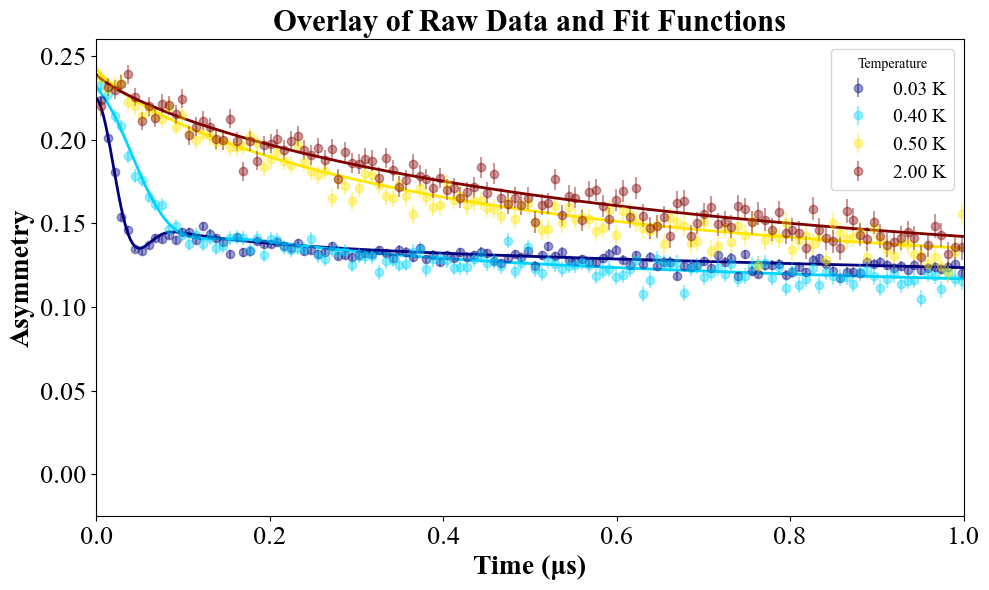

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm

# ----------------------------------------------------------------------
# CONTROL OF SAMPLE, PARAMETER DATAFILE AND PLOTTING DIRECTION
# ----------------------------------------------------------------------

from_start = True   # True = plot from lowest run up, False = highest down
Sample_A = True     # True for Sample A, False for Sample B

# Parameter file
Parameter_datafile = 'A_23-07-25_negativeBkg_Beta0p8_sigma.txt'

# Directory containing raw spectra files
path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/Spectra_80Bin_10us/'

# List only the runs you want to include
if Sample_A:
    datafiles = [
        '2460.dat',
        # '2461.dat',
        # '2462.dat',
        # '2463.dat',
        # '2464.dat',
        # '2465.dat',
        # '2466.dat',
        '2467.dat',
        '2468.dat',
        # '2469.dat',
        # '2470.dat',
        # '2471.dat',
        '2472.dat',
    ]
else:
    datafiles = [
        '2477.dat',
        '2478.dat',
        '2479.dat',
        '2480.dat',
        '2481.dat',
        '2482.dat',
        '2483.dat',
        '2484.dat',
        '2485.dat',
        '2486.dat',
        '2487.dat',
        '2488.dat',
    ]

# ----------------------------------------------------------------------
# FIT FUNCTION USING ASYMMETRY FUNCTION
# ----------------------------------------------------------------------

def YBO_fit_function(run_no, datafile, x_min=0, x_max=10, points=10000):
    df = pd.read_csv(datafile, delim_whitespace=True)
    df_run = df[df['RUN'] == run_no].squeeze()

    t = np.linspace(x_min, x_max, points)

    f_F = df_run['Order_Vfrac_2461']
    sigma = df_run['YBO_sigma_2461']
    nu = df_run['Frequency_2461']
    phi = df_run['Phase']
    lam_tail = df_run['Tail_Lambda_2461']
    lam_para = df_run['YBO_paraLam2_2461']
    lam_Ag = df_run['Ag_Lambda']
    beta_tail = 1
    beta_para = df_run['YBO_paraBeta2_2461']
    Background = df_run['constant'] if 'constant' in df_run else 0
    beta_Ag = 1
    A_T = df_run['Asy_tot']
    Ag_F = df_run['Ag_frac']
    Temp = df_run['dataT']

    A = muon_asymmetry(t, f_F, sigma, nu, phi, lam_tail, lam_para, lam_Ag,
                    beta_tail, beta_para, beta_Ag, A_T, Ag_F, Background)
    return t, A, Temp

# ----------------------------------------------------------------------
# MAIN PLOTTING ROUTINE
# ----------------------------------------------------------------------

# Sort files and extract run numbers
datafiles = sorted(datafiles, reverse=not from_start)
run_numbers = [int(f.split('.')[0]) for f in datafiles]

# Set up plot
plt.figure(figsize=(10, 6))
cmap = cm.get_cmap('jet', len(run_numbers))

# Font settings
font_path = 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fprop.get_name()
plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

for i, (run_no, fname) in enumerate(zip(run_numbers, datafiles)):
    color = cmap(i)

    # Plot raw data with temp label
    try:
        df = pd.read_csv(os.path.join(path, fname), sep=',\s*', engine='python')
        x = df['xData0']
        y = df['data0']
        yerr = df['errData0']

        # Get fit and temperature for label
        t_fit, A_fit, temp = YBO_fit_function(run_no, Parameter_datafile, x_min=0, x_max=1)
        label = f'{temp:.2f} K'

        # Plot data
        plt.errorbar(x, y, yerr=yerr, fmt='o', color=color, alpha=0.4, label=label)

        # Plot fit (no label)
        plt.plot(t_fit, A_fit, color=color, linewidth=2)

    except Exception as e:
        print(f"Error processing run {run_no}: {e}")
        continue

# Final formatting
plt.xlabel('Time (μs)', fontsize=20, weight='bold')
plt.ylabel('Asymmetry', fontsize=20, weight='bold')
plt.title('Overlay of Raw Data and Fit Functions', fontsize=22, weight='bold')
plt.xlim(0, 1)
plt.ylim(-0.025, 0.26)
plt.legend(fontsize=14, title='Temperature')
plt.tight_layout()

# Save
output_dir = f'{Parameter_datafile}_OVERLAYED_PLOT'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'all_data_and_fits_overlayed.png')
#plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()


<>:57: SyntaxWarning: invalid escape sequence '\s'
<>:57: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3307349789.py:57: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv(os.path.join(path, fname), sep=',\s*', engine='python') for fname in datafiles]
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3307349789.py:60: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  param_df = pd.read_csv(Parameter_datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3307349789.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(dfs))
C:\Users\TXB909\AppData\Local\Temp\ipykernel_78356\3676603700.py:59: FutureW

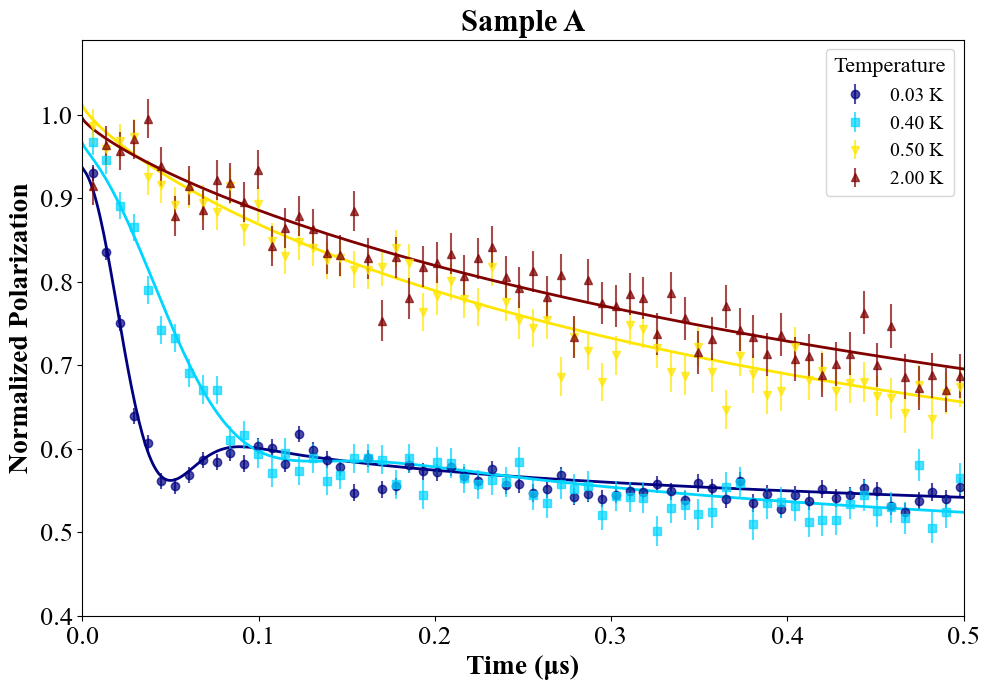

In [ ]:


'''
GEDIMINAS OR OTHERS PLEASE EDIT THIS CELL FOR PLOTTING!
'''
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import re  # regex for extracting run_no from filename

# CONTROL OF SAMPLE, PARAMETER DATAFILE AND PLOTTING DIRECTION
from_start = True  # True = ascending run numbers, False = descending
Sample_A = True  # True for sample A, False for sample B

# Path to fit parameter file
if Sample_A:
    Parameter_datafile = 'A_23-07-25_negativeBkg_Beta0p8_sigma.txt'
    Title = 'Sample A'
if not Sample_A:
    Parameter_datafile = 'B_23-07-25_full_with_NegativeBkgBeta_0p8.txt'
    Title = 'Sample B'
# List only the runs you want to include (comment/uncomment runs freely)
if Sample_A:
    datafiles = [
        '2460.dat',
        #'2461.dat',
        #'2462.dat',
        #'2463.dat',
        #'2464.dat',
        #'2465.dat',
        #'2466.dat',
        '2467.dat',
        '2468.dat',
        #'2469.dat',
        #'2470.dat',
        #'2471.dat',
        '2472.dat',
    ]
else:
    datafiles = [
        '2477.dat',
        #'2478.dat',
        #'2479.dat',
        #'2480.dat',
        #'2481.dat',
        '2482.dat',
        '2483.dat',
        '2484.dat',
        #'2485.dat',
        #'2486.dat',
        #'2487.dat',
        '2488.dat',
    ]

# Path to spectra data files
path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/Spectra_80Bin_10us/'

# Load all spectra into dataframes
dfs = [pd.read_csv(os.path.join(path, fname), sep=',\s*', engine='python') for fname in datafiles]

# Load fit parameters dataframe once
param_df = pd.read_csv(Parameter_datafile, delim_whitespace=True)

# Set up colormap and fonts
cmap = cm.get_cmap('jet', len(dfs))
font_path = 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fprop.get_name()
plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

output_dir = f'{Parameter_datafile}Spectra_and_fit_plots'
os.makedirs(output_dir, exist_ok=True)

# Prepare figure for overlay plot
fig, ax = plt.subplots(figsize=(10, 7))

for i, (df, fname) in enumerate(zip(dfs, datafiles)):
    color = cmap(i)

    # Extract run number from filename (assumes digits in filename are the run number)
    match = re.search(r'(\d+)', fname)
    if not match:
        print(f'Warning: Could not extract run number from filename "{fname}". Skipping.')
        continue
    run_no = int(match.group(1))

    # Extract x, y, yerr from raw data
    x = df['xData0']
    y = df['data0']
    yerr = df['errData0']

    # Get Asy_tot (A_T) for this run to normalise
    param_row = param_df[param_df['RUN'] == run_no]
    if param_row.empty:
        print(f'Warning: RUN {run_no} not found in parameter file, skipping.')
        continue

    A_T = param_row['Asy_tot'].values[0]
    temp = param_row['dataT'].values[0]

    # Normalise raw data
    y_norm = y / A_T
    yerr_norm = yerr / A_T

    # Plot normalised raw data, label by temperature
    marker_styles = [
    'o',  # circle
    's',  # square
    'v',  # triangle down
    '^',  # triangle up
    '<',  # triangle left
    '>',  # triangle right
    'D',  # diamond
    'p',  # pentagon
    '*',  # star
    'h',  # hexagon
    ]
    marker = marker_styles[i % len(marker_styles)]
    ax.errorbar(x, y_norm, yerr=yerr_norm, fmt=marker, color=color, alpha=0.7, label=f'{temp:.2f} K')

    # Get fit function output (times, asymmetry array, temperature)
    t_fit, A_fit, _ = YBO_fit_function(run_no, Parameter_datafile, x_min=0, x_max=10, points=10000)

    # Normalise fit output by same A_T
    A_fit_norm = A_fit / A_T

    # Plot normalised fit curve
    ax.plot(t_fit, A_fit_norm, color=color, linewidth=2)

# Format axes and labels
ax.set_xlabel('Time (μs)', fontsize=20, weight='bold')
ax.set_ylabel('Normalized Polarization', fontsize=20, weight='bold')
ax.set_xlim(0, 0.5)
ax.set_ylim(0.4, 1.09)

ax.set_title(Title, fontsize=22, weight='bold')

# Only show legend for raw data (fits have no labels)
ax.legend(title='Temperature', fontsize=14, title_fontsize=16, loc='upper right')

plt.tight_layout()

# Save figure
figpath = os.path.join(output_dir, 'normalised_asymmetry_all_runs.png')


def get_unique_filename(base_path, base_name, ext):
    counter = 0
    while True:
        suffix = f"_{counter:03d}"
        full_name = f"{base_name}{suffix}.{ext}"
        full_path = os.path.join(base_path, full_name)
        if not os.path.exists(full_path):
            return full_path
        counter += 1

filename = get_unique_filename(output_dir, f"asymmetry_overlay_Sample{'A' if Sample_A else 'B'}", "png")
fig.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()


<>:53: SyntaxWarning: invalid escape sequence '\s'
<>:53: SyntaxWarning: invalid escape sequence '\s'
C:\Users\TXB909\AppData\Local\Temp\ipykernel_81256\3386019562.py:53: SyntaxWarning: invalid escape sequence '\s'
  dfs = [pd.read_csv(os.path.join(path, fname), sep=',\s*', engine='python') for fname in datafiles]
C:\Users\TXB909\AppData\Local\Temp\ipykernel_81256\3386019562.py:56: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  param_df = pd.read_csv(Parameter_datafile, delim_whitespace=True)
C:\Users\TXB909\AppData\Local\Temp\ipykernel_81256\3386019562.py:59: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('jet', len(dfs))
C:\Users\TXB909\AppData\Local\Temp\ipykernel_81256\3386019562.py:53: SyntaxW

NameError: name 'YBO_fit_function' is not defined

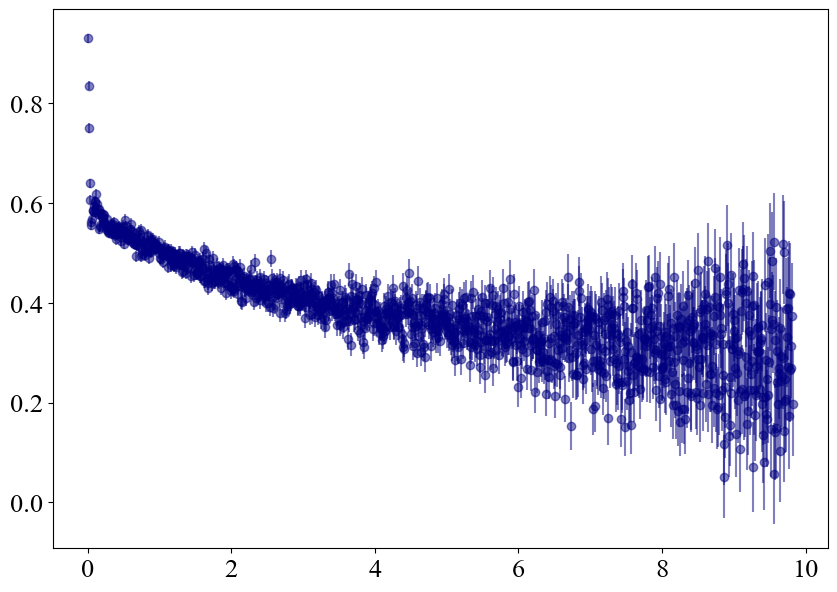

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import re  # regex for extracting run_no from filename

# CONTROL OF SAMPLE, PARAMETER DATAFILE AND PLOTTING DIRECTION
from_start = True  # True = ascending run numbers, False = descending
Sample_A = True  # True for sample A, False for sample B

# Path to fit parameter file
Parameter_datafile = 'A_23-07-25_negativeBkg_Beta0p8_sigma.txt'

# List only the runs you want to include (comment/uncomment runs freely)
if Sample_A:
    datafiles = [
        '2460.dat',
        #'2461.dat',
        #'2462.dat',
        #'2463.dat',
        #'2464.dat',
        #'2465.dat',
        #'2466.dat',
        '2467.dat',
        '2468.dat',
        #'2469.dat',
        #'2470.dat',
        #'2471.dat',
        '2472.dat',
    ]
else:
    datafiles = [
        '2477.dat',
        '2478.dat',
        '2479.dat',
        '2480.dat',
        '2481.dat',
        '2482.dat',
        '2483.dat',
        '2484.dat',
        '2485.dat',
        '2486.dat',
        '2487.dat',
        '2488.dat',
    ]

# Path to spectra data files
path = 'C:/Users/TXB909/Documents/strain-cell/PPMS_Data_and_Plotting/Plotting/MusrPlotting/New_format_plotting/Beta_1/Spectra/Spectra_80Bin_10us/'

# Load all spectra into dataframes
dfs = [pd.read_csv(os.path.join(path, fname), sep=',\s*', engine='python') for fname in datafiles]

# Load fit parameters dataframe once
param_df = pd.read_csv(Parameter_datafile, delim_whitespace=True)

# Set up colormap and fonts
cmap = cm.get_cmap('jet', len(dfs))
font_path = 'C:\\Windows\\Fonts\\times.TTF'
fprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fprop.get_name()
plt.rc('xtick', labelsize=19)
plt.rc('ytick', labelsize=19)

output_dir = f'{Parameter_datafile}Spectra_and_fit_plots'
os.makedirs(output_dir, exist_ok=True)

# Prepare figure for overlay plot
fig, ax = plt.subplots(figsize=(10, 7))

for i, (df, fname) in enumerate(zip(dfs, datafiles)):
    color = cmap(i)

    # Extract run number from filename (assumes digits in filename are the run number)
    match = re.search(r'(\d+)', fname)
    if not match:
        print(f'Warning: Could not extract run number from filename "{fname}". Skipping.')
        continue
    run_no = int(match.group(1))

    # Extract x, y, yerr from raw data
    x = df['xData0']
    y = df['data0']
    yerr = df['errData0']

    # Get Asy_tot (A_T) for this run to normalise
    param_row = param_df[param_df['RUN'] == run_no]
    if param_row.empty:
        print(f'Warning: RUN {run_no} not found in parameter file, skipping.')
        continue

    A_T = param_row['Asy_tot'].values[0]
    temp = param_row['dataT'].values[0]

    # Normalise raw data
    y_norm = y / A_T
    yerr_norm = yerr / A_T

    # Plot normalised raw data, label by temperature
    marker_styles = [
    'o',  # circle
    's',  # square
    'v',  # triangle down
    '^',  # triangle up
    '<',  # triangle left
    '>',  # triangle right
    'D',  # diamond
    'p',  # pentagon
    '*',  # star
    'h',  # hexagon
    ]
    marker = marker_styles[i % len(marker_styles)]
    ax.errorbar(x, y_norm, yerr=yerr_norm, fmt=marker, color=color, alpha=0.5, label=f'{temp:.2f} K')

    # Get fit function output (times, asymmetry array, temperature)
    t_fit, A_fit, _ = YBO_fit_function(run_no, Parameter_datafile, x_min=0, x_max=1, points=1000)

    # Normalise fit output by same A_T
    A_fit_norm = A_fit / A_T

    # Plot normalised fit curve
    ax.plot(t_fit, A_fit_norm, color=color, linewidth=2)

# Format axes and labels
ax.set_xlabel('Time (μs)', fontsize=20, weight='bold')
ax.set_ylabel('Normalized Polarization', fontsize=20, weight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0.4, 1.01)
ax.set_title('Sample A', fontsize=22, weight='bold')

# Only show legend for raw data (fits have no labels)
ax.legend(title='Temperature', fontsize=14, title_fontsize=16, loc='upper right')

plt.tight_layout()

# Save figure
figpath = os.path.join(output_dir, 'normalised_asymmetry_all_runs.png')
#fig.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()
